In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

# Read the dataframe

In [49]:
df = pd.read_csv('/kaggle/input/resume-dataset/Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


# Check if there is any missing value in the dataframe

In [6]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

- no null values are there in the dataset

In [7]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [9]:
df.shape

(2484, 4)

# Exploratory Data Analysis

### ID

In [10]:
df['ID'].value_counts()

16852973    1
26586477    1
27176039    1
22249155    1
25142074    1
           ..
52684666    1
19774173    1
23011221    1
13367322    1
37473139    1
Name: ID, Length: 2484, dtype: int64

In [11]:
len(df['ID'].value_counts())

2484

- ID columns are unique so we will drop this later

# Resume_str

In [12]:
len(df['Resume_str'].value_counts())

2482

- two of the resumes are seems to duplicate

In [13]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,ID,Resume_str,Resume_html,Category


In [14]:
df['Resume_str'].duplicated().value_counts()

False    2482
True        2
Name: Resume_str, dtype: int64

In [15]:
dictionary = df['Resume_str'].duplicated().to_dict()

In [16]:
for key , value in dictionary.items():
    #print(key,value)
    if value == True:
        print(key,value)

1509 True
2483 True


- 1509 and 2483 row is duplicate

In [17]:
df.iloc[1509].values

array([28398216,
       '         FINANCE OFFICER         Professional Summary    To attain a full-time position in the accounting and finance field where I can utilize the concepts I have learned and the experience I have gained to add value to the company. 25 years of work experience. Fields of expertise include government accounting, auditing and budget management. \nAssigned as Finance Officer and Acting Bureau of Internal Revenue Representative for 8 ½ years at the Philippine Consulate General, San Francisco. Succeeded in increasing BIR income tax collections by 500%. \n17 years with the Philippine Department of Tourism as an Administrative and Finance Officer. Responsible for finance & budget management.\nOutstanding organization skills and excellent communication skills. Detail oriented and dependable team player.      Skills                    Work History      Finance Officer  ,     01/1997  \n                            to   04/2014     Company Name   –   City  ,\n           

In [18]:
df.iloc[2483].values

array([37473139,
       "         STOREKEEPER II       Professional Summary    The purpose of this document is to secure a responsible career position that fully utilizes educational knowledge and experience while contributing to the goals and values of this organization. Having a friendly attitude and worm personality is an appreciated strong point, as it aided in building positive relationships with customers. As a result, repeat and satisfied customers were well known during career at Pioneer Packaging as well as while working for City of Peoria. Helping people is one of my best characteristics. Obtaining several years experience contacting vendors, answering phones and face to face contact with the public and governmental personnel has honed my customer service abilities. Problem solving skills and a positive work ethic makes communication easier. I am devoted and dedicated to serving in any way possible, and strive to accomplish assigned tasks quickly and efficiently. Exceptional 

# Resume_html

In [19]:
len(df['Resume_html'].value_counts())

2482

In [20]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,ID,Resume_str,Resume_html,Category


In [21]:
df['Resume_html'].duplicated().value_counts()

False    2482
True        2
Name: Resume_html, dtype: int64

In [22]:
dictionary = df['Resume_html'].duplicated().to_dict()
for key , value in dictionary.items():
    #print(key,value)
    if value == True:
        print(key,value)

1509 True
2483 True


In [23]:
df.iloc[1509].values

array([28398216,
       '         FINANCE OFFICER         Professional Summary    To attain a full-time position in the accounting and finance field where I can utilize the concepts I have learned and the experience I have gained to add value to the company. 25 years of work experience. Fields of expertise include government accounting, auditing and budget management. \nAssigned as Finance Officer and Acting Bureau of Internal Revenue Representative for 8 ½ years at the Philippine Consulate General, San Francisco. Succeeded in increasing BIR income tax collections by 500%. \n17 years with the Philippine Department of Tourism as an Administrative and Finance Officer. Responsible for finance & budget management.\nOutstanding organization skills and excellent communication skills. Detail oriented and dependable team player.      Skills                    Work History      Finance Officer  ,     01/1997  \n                            to   04/2014     Company Name   –   City  ,\n           

In [24]:
df.iloc[2483].values

array([37473139,
       "         STOREKEEPER II       Professional Summary    The purpose of this document is to secure a responsible career position that fully utilizes educational knowledge and experience while contributing to the goals and values of this organization. Having a friendly attitude and worm personality is an appreciated strong point, as it aided in building positive relationships with customers. As a result, repeat and satisfied customers were well known during career at Pioneer Packaging as well as while working for City of Peoria. Helping people is one of my best characteristics. Obtaining several years experience contacting vendors, answering phones and face to face contact with the public and governmental personnel has honed my customer service abilities. Problem solving skills and a positive work ethic makes communication easier. I am devoted and dedicated to serving in any way possible, and strive to accomplish assigned tasks quickly and efficiently. Exceptional 

# Category

In [25]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

<Axes: >

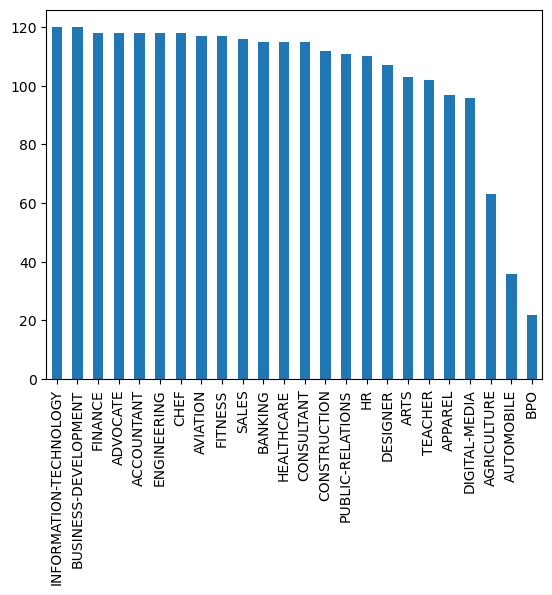

In [26]:
df['Category'].value_counts().plot(kind='bar')

# Data Cleaning

In [5]:
df_copy = df.copy()
df_copy.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
# Special Characters removal

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    clean_text = text.str.replace(pattern, '', regex=True)
    return clean_text

def remove_spaces(text):
    clean_text = text.str.replace(' ', '', regex=False)
    return clean_text

def remove_tabs(text):
    clean_text = text.str.replace('\t', '', regex=False)
    return clean_text

In [8]:
cleaned_data = df_copy
resumes_df = pd.DataFrame(cleaned_data)

for column in ["Resume_str"]:
    resumes_df[column] = remove_special_characters(resumes_df[column])
    resumes_df[column] = remove_tabs(resumes_df[column])
    resumes_df[column] = remove_spaces(resumes_df[column])
    

In [9]:
resumes_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HRADMINISTRATORMARKETINGASSOCIATE\n\nHRADMINIS...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,HRSPECIALISTUSHROPERATIONSSummaryVersatilemedi...,"<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HRDIRECTORSummaryOver20yearsexperienceinrecrui...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HRSPECIALISTSummaryDedicatedDrivenandDynamicwi...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HRMANAGERSkillHighlightsHRSKILLSHRDepartmentSt...,"<div class=""fontsize fontface vmargins hmargin...",HR


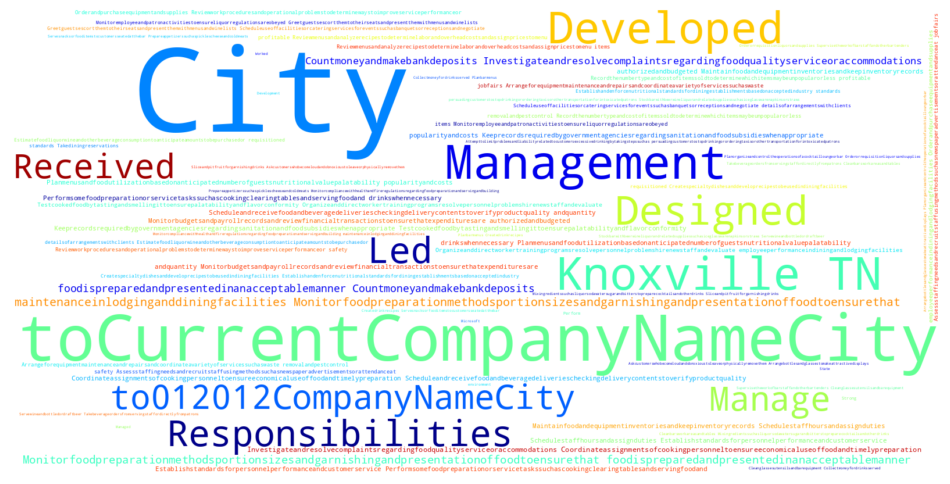

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(resumes_df['Resume_str'][:2484])

- most frequest words are City,Management,Responsibilities,CompanyName

In [13]:
import spacy
from spacy import displacy

## Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

## Function to extract experience from text
def extract_experience(text):
    doc = nlp(text)
    experience = ''
    
    ## Extract experience using spaCy's entity recognition and dependency parsing
    for ent in doc.ents:
        if ent.label_ == "DATE" and 'year' in ent.text.lower():
            ## Extract the number of years from the entity text
            for token in doc:
                if token.idx >= ent.start_char and token.idx + len(token) <= ent.end_char:
                    if token.pos_ == 'NUM':
                        experience = token.text
                        break
    
    return experience

## Function to extract technical skills from text
def extract_technical_skills(text):
    doc = nlp(text.lower())
    skills = []

    specific_skills = [
        'react js', 'python' , 'javascript', 'html', 'css', 'webpack', 'npm',
         'hcm', 'report writer', 'eib', 'core connector',
        'sql', 'database', 'pl/sql', 'oracle', 'mysql', 't-sql'
        , 'hrms', 'peoplecode', 'application engine', 'sqr'
    ]

    for keyword in specific_skills:
        if keyword in text.lower():
            skills.append(keyword)

    return skills




df_copy['Experience'] = df_copy['Resume_str'].apply(extract_experience)
## Apply the extract_technical_skills function to the 'Extracted_text' column
df_copy['Skills'] = df_copy['Resume_str'].apply(extract_technical_skills)


## Save the modified DataFrame back to the Excel file
df_copy.to_excel('Final.xlsx', index=False)

In [14]:
excel = pd.read_excel('/kaggle/working/Final.xlsx')
excel.head()

,ID,Resume_str,Resume_html,Category,Experience,Skills
0,16852973,HRADMINISTRATORMARKETINGASSOCIATE\n\nHRADMINIS...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,[]
1,22323967,HRSPECIALISTUSHROPERATIONSSummaryVersatilemedi...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,[]
2,33176873,HRDIRECTORSummaryOver20yearsexperienceinrecrui...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,['database']
3,27018550,HRSPECIALISTSummaryDedicatedDrivenandDynamicwi...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,['database']
4,17812897,HRMANAGERSkillHighlightsHRSKILLSHRDepartmentSt...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,[]


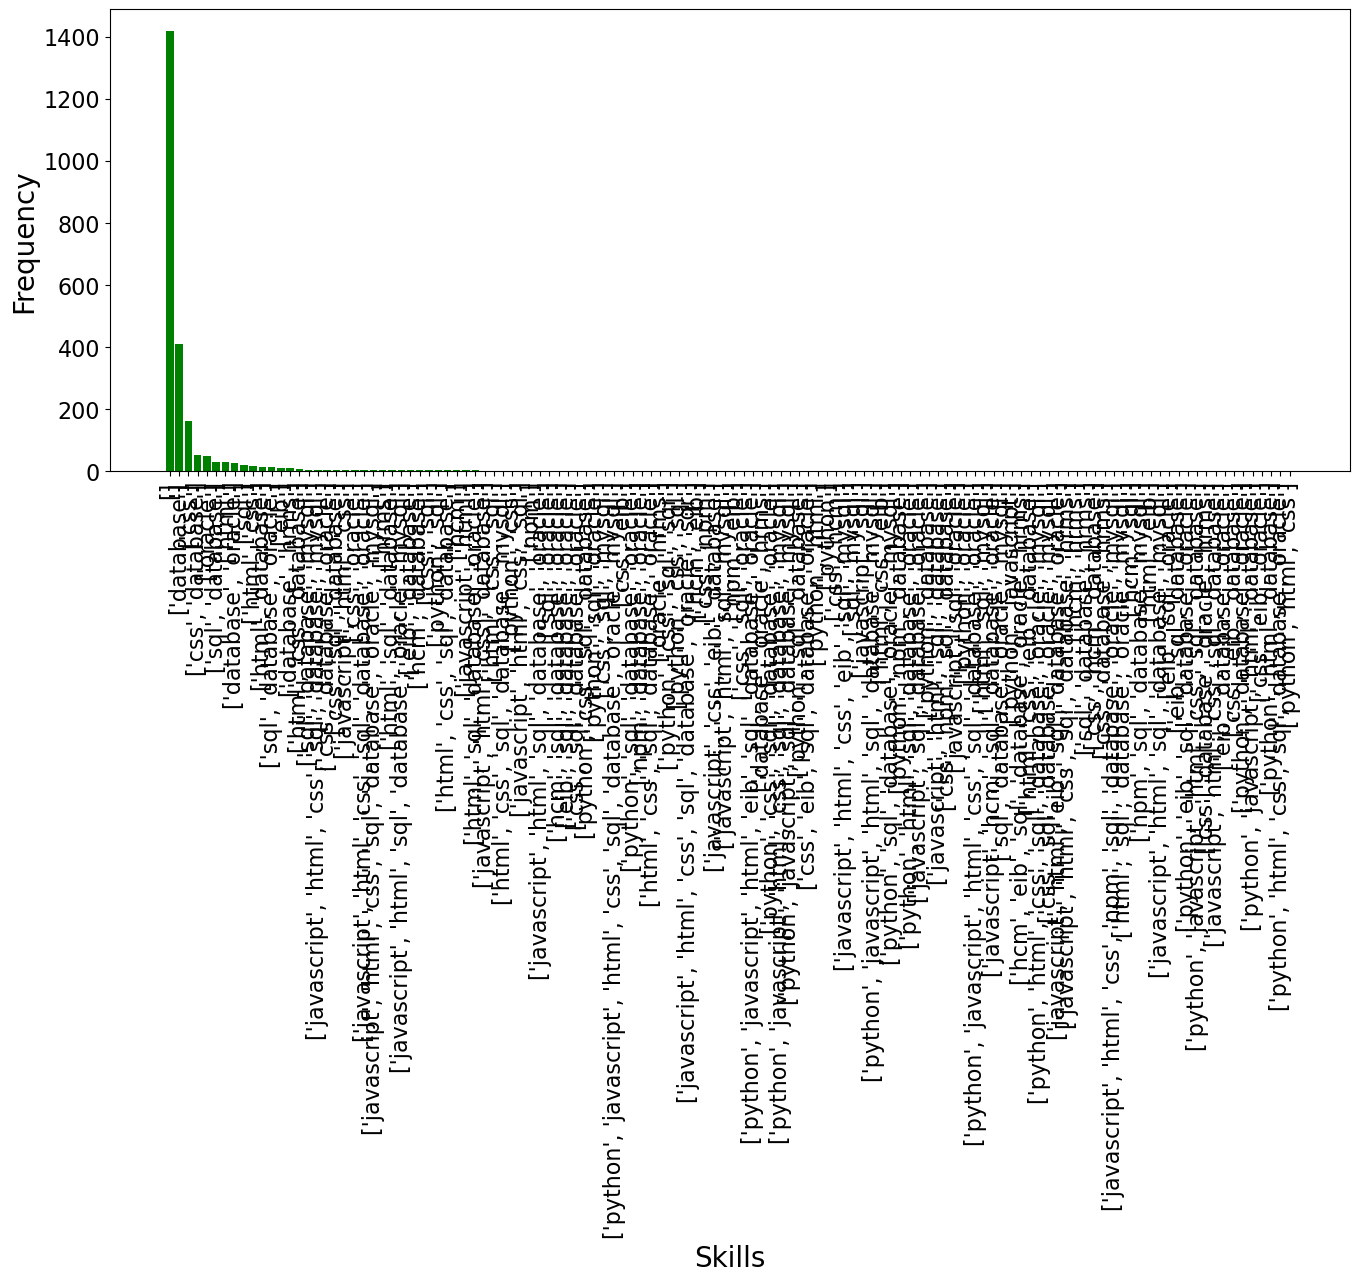

In [17]:
## Calculate the frequency of each category
category_counts = excel['Skills'].value_counts()

## Create the bar plot
plt.figure(figsize=(16, 6))
plt.bar(category_counts.index, category_counts.values,color='green')

## Customize the plot
plt.xlabel('Skills',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=16)
plt.xticks(rotation=90)
plt.yticks(fontsize=16)
plt.show()

# Feature Extraction

In [42]:
enc = LabelEncoder()

df["label"] = enc.fit_transform(df["Category"])
df.head()

,ID,Resume_str,Resume_html,Category,label
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,19
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,19
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,19
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,19
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,19


In [44]:
X = df['Resume_str'].values
y = df['label'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
print(X_train.shape, X_test.shape)

(1987,) (497,)


In [46]:
tfidf = TfidfVectorizer(sublinear_tf=True,stop_words='english')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


# Train the Model

## Random Forest Classifier

In [53]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(rf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (rf,classification_report(y_test, y_pred)))
nb_score = rf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.66
Classification report for classifier RandomForestClassifier(n_estimators=300):
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        24
           1       0.70      0.58      0.64        24
           2       1.00      0.31      0.47        13
           3       0.88      0.37      0.52        19
           4       0.50      0.05      0.09        21
           5       0.00      0.00      0.00         7
           6       0.76      0.96      0.85        23
           7       0.75      0.78      0.77        23
           8       0.00      0.00      0.00         4
           9       0.44      0.50      0.47        24
          10       0.73      0.92      0.81        24
          11       0.78      0.95      0.86        22
          12       0.50      0.17      0.26        23
          13       0.93      0.67      0.78        21
          14       0.65      0.68      0.67   

# Decision Tree Classifier

In [54]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.58
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.68      0.79      0.73        24
           2       0.27      0.31      0.29        13
           3       0.35      0.32      0.33        19
           4       0.41      0.43      0.42        21
           5       0.14      0.14      0.14         7
           6       0.83      0.83      0.83        23
           7       0.48      0.57      0.52        23
           8       0.00      0.00      0.00         4
           9       0.41      0.38      0.39        24
          10       0.84      0.88      0.86        24
          11       0.71      0.77      0.74        22
          12       0.42      0.57      0.48        23
          13       0.87      0.95      0.91        21
          14       0.38      0.32      0.34        19
        

# SVM

In [55]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.99
Accuracy of  test set    : 0.63
Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.43      0.54      0.48        24
           2       1.00      0.08      0.14        13
           3       0.83      0.26      0.40        19
           4       0.53      0.38      0.44        21
           5       0.00      0.00      0.00         7
           6       0.74      0.87      0.80        23
           7       0.83      0.87      0.85        23
           8       0.00      0.00      0.00         4
           9       0.39      0.62      0.48        24
          10       0.90      0.75      0.82        24
          11       0.74      0.91      0.82        22
          12       0.32      0.26      0.29        23
          13       0.85      0.52      0.65        21
          14       0.60      0.63      0.62        19
          15       0.63    

In [56]:
model_lgr = LogisticRegression()
model_lgr.fit(X_train, y_train)
y_pred = model_lgr.predict(X_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.86
Accuracy of  test set    : 0.64
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.52      0.50      0.51        24
           2       1.00      0.15      0.27        13
           3       0.83      0.26      0.40        19
           4       0.55      0.29      0.37        21
           5       0.00      0.00      0.00         7
           6       0.72      0.91      0.81        23
           7       0.81      0.91      0.86        23
           8       0.00      0.00      0.00         4
           9       0.42      0.54      0.47        24
          10       0.83      0.83      0.83        24
          11       0.70      0.95      0.81        22
          12       0.25      0.09      0.13        23
          13       0.85      0.52      0.65        21
          14       0.62      0.68      0.65        19
          15

In [57]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(X_train, y_train)
y_pred = model_bagg.predict(X_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.70
Accuracy of  test set    : 0.55
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.48      0.42      0.44        24
           2       1.00      0.15      0.27        13
           3       0.33      0.16      0.21        19
           4       0.80      0.19      0.31        21
           5       0.00      0.00      0.00         7
           6       0.75      0.52      0.62        23
           7       0.75      0.52      0.62        23
           8       0.00      0.00      0.00         4
           9       0.19      0.71      0.30        24
          10       0.95      0.79      0.86        24
          11       0.71      0.91      0.80        22
          12       0.20      0.04      0.07        23
          13       0.76      0.62   

In [58]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(X_train, y_train)
y_pred = model_Adaboost.predict(X_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.14
Accuracy of  test set    : 0.14
Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        24
           1       0.06      1.00      0.11        24
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        24
          10       0.87      0.83      0.85        24
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00        21
          14       0.00      0.00      0.00       

In [59]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(X_train, y_train)
y_pred = model_GradientBoost.predict(X_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.58
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.67      0.75      0.71        24
           2       0.40      0.15      0.22        13
           3       0.62      0.42      0.50        19
           4       0.40      0.48      0.43        21
           5       0.00      0.00      0.00         7
           6       0.06      0.09      0.07        23
           7       0.81      0.57      0.67        23
           8       1.00      0.75      0.86         4
           9       0.40      0.42      0.41        24
          10       1.00      0.79      0.88        24
          11       0.88      0.64      0.74        22
          12       0.70      0.61      0.65        23
          13       0.86      0.57      0.69        21
          14

In [60]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.72
Accuracy of  test set    : 0.55
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        24
           1       0.42      0.46      0.44        24
           2       0.00      0.00      0.00        13
           3       0.75      0.16      0.26        19
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         7
           6       0.67      0.70      0.68        23
           7       0.84      0.70      0.76        23
           8       0.00      0.00      0.00         4
           9       0.28      0.75      0.41        24
          10       0.79      0.79      0.79        24
          11       0.67      0.82      0.73        22
          12       0.00      0.00      0.00        23
          13       0.88      0.33      0.48        21
          14       0.86      0.32      0.46    

In [68]:
X.shape

(2484,)

In [69]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [70]:
print(X_train.shape)
print(y_train.shape)

(1987,)
(1987,)


In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
# 1. Preprocessing
# Set some parameters
vocab_size = 10000  # You can adjust this based on your dataset
embedding_dim = 128
max_length = 500  # You can adjust this based on the average length of the resumes
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

# Tokenize the resumes
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Convert text to sequences and pad them
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert labels to numpy array
training_labels = np.array(y_train)
early_stop = EarlyStopping(monitor='val_loss', patience=5)
# 2. Model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(256, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(24, activation='softmax')  # Number of neurons in the last layer should match the number of unique labels
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Training
model.fit(training_padded, training_labels, epochs=100, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
50/50 [==============================] - 9s 155ms/step - loss: 6.7954 - accuracy: 0.0667 - val_loss: 5.2070 - val_accuracy: 0.1080
Epoch 2/100
50/50 [==============================] - 8s 156ms/step - loss: 4.8770 - accuracy: 0.2001 - val_loss: 5.0623 - val_accuracy: 0.2085
Epoch 3/100
50/50 [==============================] - 8s 152ms/step - loss: 4.6556 - accuracy: 0.4475 - val_loss: 5.2067 - val_accuracy: 0.5176
Epoch 4/100
50/50 [==============================] - 8s 156ms/step - loss: 4.2901 - accuracy: 0.6960 - val_loss: 5.0864 - val_accuracy: 0.6106
Epoch 5/100
50/50 [==============================] - 7s 150ms/step - loss: 3.9363 - accuracy: 0.8364 - val_loss: 4.8722 - val_accuracy: 0.6558
Epoch 6/100
50/50 [==============================] - 8s 151ms/step - loss: 3.6784 - accuracy: 0.8785 - val_loss: 4.5064 - val_accuracy: 0.6834
Epoch 7/100
50/50 [==============================] - 8s 152ms/step - loss: 3.3879 - accuracy: 0.9056 - val_loss: 4.4484 - val_accuracy: 0.6583

In [27]:
!pip install transformers datasets

In [18]:
!pip install -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.3 MB/s eta 0:00:0000:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [51]:
# Function to clean resume text
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@
    [\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]
    # remove stopwords
    return ' '.join(filtered_text)

In [52]:
print(df['Resume_str'][0])

         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss preve

In [53]:
# Clean the resume
df['cleaned_resume'] = df.Resume_str.apply(lambda x: clean_text(x))

print(df['cleaned_resume'][0])

hr administrator marketing associate hr administrator summary dedicated customer service manager 15 years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist omplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification omplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec 2013 current company name city state helps deve

In [54]:
# Get features and labels from data and shuffle
features = df['cleaned_resume'].values
original_labels = df['Category'].values
labels = original_labels[:]

for i in range(len(df)):
    labels[i] = str(labels[i].lower())  # convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

import random
random.seed(20)
features, labels = shuffle(features, labels, random_state=20)

# Print example feature and label
print(features[0])
print(labels[0])

outside machinist summary responding great interest advertisement carrier overhaul network scheduling position would ideal match position 15 year military veteran served country hard work dedication looking forward bringing trades company addition extensive professional experience ton experience carrier overhaul planning scheduling administrative skills broad background makes excellent candidate position look forward meeting person discuss qualification thank time consideration work experience 12 2012 current outside machinist company name city state skilled installation propulsion machinery sea valves steering gear anchor handling equipment elevators pumps ventilation fans weapons systems process installing equipment experience gained use math blueprints precision tooling portable machine tools also become familiar procedures precision line boring precision alignment machinery bearing fitting machinery assembly surface machining precision reaming machinery weapons testing 11 1996 01 2

In [55]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * len(df))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

1987
497


In [58]:
train_labels

array(['aviation', 'digital-media', 'teacher', ..., 'sales',
       'information-technology', 'digital-media'], dtype=object)

In [59]:
# Tokenize feature data and print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
#print(test_feature_sequences[0])

{'<OOV>': 1, 'state': 2, 'company': 3, 'city': 4, 'management': 5, 'name': 6, 'sales': 7, 'customer': 8, 'business': 9, 'skills': 10, 'new': 11, 'service': 12, 'team': 13, 'development': 14, 'training': 15, 'experience': 16, 'project': 17, 'work': 18, 'manager': 19, 'information': 20, 'marketing': 21, 'financial': 22, 'office': 23, 'education': 24, 'support': 25, 'including': 26, 'staff': 27, 'professional': 28, 'data': 29, 'system': 30, 'systems': 31, 'university': 32, 'managed': 33, 'process': 34, 'customers': 35, 'design': 36, 'quality': 37, 'client': 38, 'clients': 39, 'developed': 40, 'reports': 41, 'analysis': 42, 'operations': 43, 'product': 44, 'high': 45, 'program': 46, 'services': 47, 'microsoft': 48, 'ounting': 49, '01': 50, '2014': 51, 'current': 52, 'maintained': 53, 'ounts': 54, 'responsible': 55, 'software': 56, '2013': 57, 'procedures': 58, 'time': 59, 'planning': 60, 'school': 61, 'projects': 62, 'communication': 63, 'performance': 64, 'ensure': 65, 'equipment': 66, 'l

In [60]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

{'business': 1, 'development': 2, 'information': 3, 'technology': 4, 'finance': 5, 'advocate': 6, 'engineering': 7, 'accountant': 8, 'chef': 9, 'aviation': 10, 'fitness': 11, 'sales': 12, 'banking': 13, 'consultant': 14, 'healthcare': 15, 'construction': 16, 'public': 17, 'relations': 18, 'hr': 19, 'designer': 20, 'arts': 21, 'teacher': 22, 'apparel': 23, 'digital': 24, 'media': 25, 'agriculture': 26, 'automobile': 27, 'bpo': 28}
[10]
[8]


In [61]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[ 915    1   95 1817  873 1190 4458 3040 4936  136  259  324 1050    1
 2723  324  658  148  838 3664  360 1775 1264   18 3162 1589 1776 2297
 3359    3 1795  486   28   16    1   16 3040 4936   60  259  184   10
 2023  573 3097  159 1636  324 2697 1776  532  670 1305 2547 3748   59
 3322   18   16  196   71   52  915    1    3    6    4    2  607  554
    1 2099 4385 4541 4684 4386    1  409   66    1 3854    1    1 2287
   31   34 2146   66   16 2087  222 1528 2235 3422 3194    1 1108  285
  323 2073 1973   58 3422  305    1 3422 2484 2099    1 4079 2099 1228
 3583 5466 3422    1 2099 2287  216  356  835   50   71  632    1    3
    6    4    2  361    1    1    1 5867  657  762  530  292 4762 4459
 2162  110  148    1 3040 4936 1286  802   55  916  712 1410    1  766
  902 1287 2060    1  826 1287 3163    1 1090  277 2869   59  268  927
  361    1    1    1    1 2137  577  292   93  160   18  202   96  421
 2287   80  146 1958 1069  571 4542 2189   18 1091  281    1   18 4937
 3040 

In [62]:

# Alternative model
embedding_dim = 64
num_categories = 25

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=300),
  tf.keras.layers.GlobalMaxPooling1D(),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(128, activation='relu'),
  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(num_categories, activation='softmax'),])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           384000    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 25)                3225      
                                                                 
Total params: 395,545
Trainable params: 395,545
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

# Print example values
#print(train_feature_padded[0])
#print(train_label_sequences[0])
#print(test_feature_padded[0])
#print(test_label_sequences[0])